# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [14]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [15]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [16]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [17]:
model = torch.nn.Linear(28*28, 10)

In [18]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.3301,  0.3433, -0.3699,  0.6974,  0.4455,  0.1227, -0.6656,  0.6131,
         -0.4199, -0.4770]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [19]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [20]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f"Epoch {i+1}/{n_epochs}; Mini-batch: {k+1}")
        print(f"\tLoss: {loss.data}")

Streaming output truncated to the last 5000 lines.
Epoch 1/5; Mini-batch: 501
	Loss: 0.21914954483509064
Epoch 1/5; Mini-batch: 502
	Loss: 0.3017265796661377
Epoch 1/5; Mini-batch: 503
	Loss: 0.3059553802013397
Epoch 1/5; Mini-batch: 504
	Loss: 0.2354879528284073
Epoch 1/5; Mini-batch: 505
	Loss: 0.23309209942817688
Epoch 1/5; Mini-batch: 506
	Loss: 0.26924559473991394
Epoch 1/5; Mini-batch: 507
	Loss: 0.4273485541343689
Epoch 1/5; Mini-batch: 508
	Loss: 0.2540576457977295
Epoch 1/5; Mini-batch: 509
	Loss: 0.2022228091955185
Epoch 1/5; Mini-batch: 510
	Loss: 0.22623151540756226
Epoch 1/5; Mini-batch: 511
	Loss: 0.3260841369628906
Epoch 1/5; Mini-batch: 512
	Loss: 0.3614503741264343
Epoch 1/5; Mini-batch: 513
	Loss: 0.33442023396492004
Epoch 1/5; Mini-batch: 514
	Loss: 0.6426344513893127
Epoch 1/5; Mini-batch: 515
	Loss: 0.29126179218292236
Epoch 1/5; Mini-batch: 516
	Loss: 0.37352871894836426
Epoch 1/5; Mini-batch: 517
	Loss: 0.25895294547080994
Epoch 1/5; Mini-batch: 518
	Loss: 0.3988

In [21]:
print('Final loss:', loss.data)

Final loss: tensor(0.2365)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

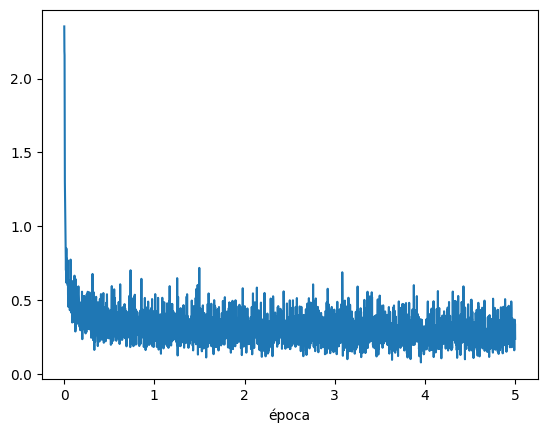

In [22]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada época

Text(0.5, 0, 'época')

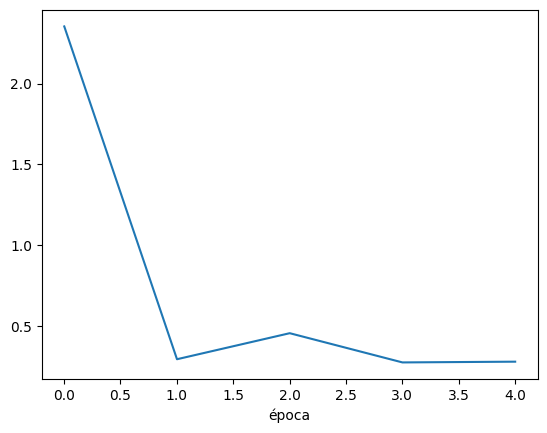

In [28]:
plt.plot(epochs[:n_epochs * n_batches_train + 1:n_batches_train], losses[:n_epochs * n_batches_train + 1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
> 100
2. Em uma época, quantos mini-batches existem?
> 600
3. Qual é a definição de época?
> Um laço completo de treinamento passando uma vez por todos os valores do dataset e atualizando os pesos conforme a perda observada.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [38]:
model_2 = torch.nn.Linear(28*28, 10)

n_epochs = 5
learningRate = 0.5
batch_size_2 = 150

optimizer_2 = torch.optim.SGD(model_2.parameters(), lr=learningRate)

loader_train_2 = DataLoader(dataset_train, batch_size=batch_size_2, shuffle=False)

epochs_2 = []
losses_2 = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train_2):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model_2(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer_2.zero_grad()
        loss.backward()
        optimizer_2.step()

        total_trained_samples += x_train.size(0)
        epochs_2.append(total_trained_samples / total_samples)
        losses_2.append(loss.data)

        print(f"Epoch {i+1}/{n_epochs}; Mini-batch: {k+1}")
        print(f"\tLoss: {loss.data}")

Epoch 1/5; Mini-batch: 1
	Loss: 2.301379442214966
Epoch 1/5; Mini-batch: 2
	Loss: 1.8886903524398804
Epoch 1/5; Mini-batch: 3
	Loss: 1.5067355632781982
Epoch 1/5; Mini-batch: 4
	Loss: 1.424467921257019
Epoch 1/5; Mini-batch: 5
	Loss: 1.3047288656234741
Epoch 1/5; Mini-batch: 6
	Loss: 1.0849462747573853
Epoch 1/5; Mini-batch: 7
	Loss: 1.0841213464736938
Epoch 1/5; Mini-batch: 8
	Loss: 1.110281229019165
Epoch 1/5; Mini-batch: 9
	Loss: 0.9571481347084045
Epoch 1/5; Mini-batch: 10
	Loss: 1.2335433959960938
Epoch 1/5; Mini-batch: 11
	Loss: 0.8795922994613647
Epoch 1/5; Mini-batch: 12
	Loss: 0.6833642721176147
Epoch 1/5; Mini-batch: 13
	Loss: 0.7018587589263916
Epoch 1/5; Mini-batch: 14
	Loss: 0.6872959733009338
Epoch 1/5; Mini-batch: 15
	Loss: 0.5571931600570679
Epoch 1/5; Mini-batch: 16
	Loss: 0.5911384224891663
Epoch 1/5; Mini-batch: 17
	Loss: 0.6417749524116516
Epoch 1/5; Mini-batch: 18
	Loss: 0.6733713746070862
Epoch 1/5; Mini-batch: 19
	Loss: 0.7291082143783569
Epoch 1/5; Mini-batch: 2

In [40]:
model_3 = torch.nn.Linear(28*28, 10)

n_epochs = 5
learningRate = 0.5
batch_size_3 = 200

optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=learningRate)

loader_train_3 = DataLoader(dataset_train, batch_size=batch_size_3, shuffle=True)

epochs_3 = []
losses_3 = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train_3):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model_3(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer_3.zero_grad()
        loss.backward()
        optimizer_3.step()

        total_trained_samples += x_train.size(0)
        epochs_3.append(total_trained_samples / total_samples)
        losses_3.append(loss.data)

        print(f"Epoch {i+1}/{n_epochs}; Mini-batch: {k+1}")
        print(f"\tLoss: {loss.data}")

Epoch 1/5; Mini-batch: 1
	Loss: 2.33231520652771
Epoch 1/5; Mini-batch: 2
	Loss: 1.8994343280792236
Epoch 1/5; Mini-batch: 3
	Loss: 1.6585921049118042
Epoch 1/5; Mini-batch: 4
	Loss: 1.421675682067871
Epoch 1/5; Mini-batch: 5
	Loss: 1.2439930438995361
Epoch 1/5; Mini-batch: 6
	Loss: 1.1221256256103516
Epoch 1/5; Mini-batch: 7
	Loss: 1.1371328830718994
Epoch 1/5; Mini-batch: 8
	Loss: 0.9671767354011536
Epoch 1/5; Mini-batch: 9
	Loss: 0.9862161874771118
Epoch 1/5; Mini-batch: 10
	Loss: 0.947512686252594
Epoch 1/5; Mini-batch: 11
	Loss: 0.8291929364204407
Epoch 1/5; Mini-batch: 12
	Loss: 0.8993555307388306
Epoch 1/5; Mini-batch: 13
	Loss: 0.8322568535804749
Epoch 1/5; Mini-batch: 14
	Loss: 0.734523594379425
Epoch 1/5; Mini-batch: 15
	Loss: 0.6863033771514893
Epoch 1/5; Mini-batch: 16
	Loss: 0.7430803775787354
Epoch 1/5; Mini-batch: 17
	Loss: 0.7387135028839111
Epoch 1/5; Mini-batch: 18
	Loss: 0.756869375705719
Epoch 1/5; Mini-batch: 19
	Loss: 0.7050503492355347
Epoch 1/5; Mini-batch: 20
	

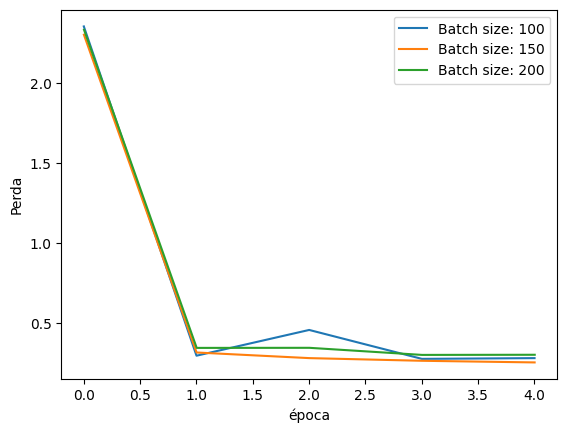

In [41]:
plt.plot(epochs[::600], losses[::600], label="Batch size: 100")
plt.plot(epochs_2[::400], losses_2[::400], label="Batch size: 150")
plt.plot(epochs_3[::300], losses_3[::300], label="Batch size: 200")


plt.xlabel('época')
plt.ylabel("Perda")
plt.legend()
plt.show()

## Conclusões sobre os experimentos deste notebook


Variando o tamanho dos mini-batches, observa-se que as oscilações da perda até a convergência são menores com o passar das épocas.

Isso se explica pelo fato de que cada etapa de treinamento com mais registros por batch tem uma porção maior da totalidade dos dados, o que ajuda a processar mais informação de uma única vez ao invés de treinar com amostras menores que geram uma certa variação entre uma iteração e outra conforme o modelo vai se ajustando ao dataset.

Em contrapartida, batches maiores geram treinamentos mais custosos do ponto de vista computacional, dada a quantidade de informação que precisa ser processada em cada iteração de treino.